In [33]:
#to build a linear regression model from scratch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [34]:
df=pd.read_csv("/content/SOCR-HeightWeight.csv")

In [35]:
df

,Index,Height(Inches),Weight(Pounds)
0,1,65.78331,112.9925
1,2,71.51521,136.4873
2,3,69.39874,153.0269
3,4,68.21660,142.3354
4,5,67.78781,144.2971
...,...,...,...
24995,24996,69.50215,118.0312
24996,24997,64.54826,120.1932
24997,24998,64.69855,118.2655
24998,24999,67.52918,132.2682


In [36]:
df.isnull().sum()

Index             0
Height(Inches)    0
Weight(Pounds)    0
dtype: int64

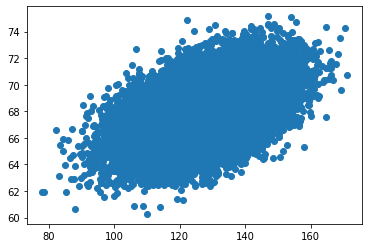

In [37]:
height_values = df["Height(Inches)"].values
weight_values = df["Weight(Pounds)"].values
plt.scatter(weight_values, height_values)

In [38]:
# Select ratio
ratio = 0.75
 
total_rows = df.shape[0]
train_size = int(total_rows*ratio)
 
# Split data into test and train
train = df[0:train_size]
test = df[train_size:]

In [39]:
test.shape
#25 persent of the data is divided

(6250, 3)

In [40]:
X_train=train["Height(Inches)"]
Y_train=train["Weight(Pounds)"]

In [41]:
X_test=test["Height(Inches)"]
Y_test=test["Weight(Pounds)"]

In [42]:
# Mean X and Y
mean_X_train = np.mean(X_train)
mean_Y_train = np.mean(Y_train)
 
# Total number of values
n = len(X_train)
# Using the formula to calculate 'm' and 'c'
numer = 0
denom = 0
for i in range(n):
 numer += (X_train[i] - mean_X_train) * (Y_train[i] - mean_Y_train)
 denom += (X_train[i] - mean_X_train) ** 2
m = numer / denom
c = mean_Y_train - (m * mean_X_train)


In [43]:
# Printing coefficients
print("Coefficients")
print(m, c)


Coefficients
3.079360445175756 -82.25318978401705


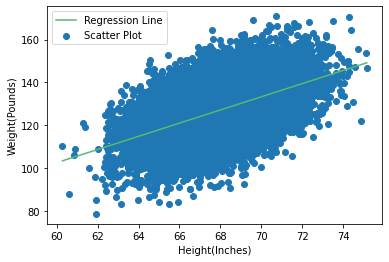

In [44]:
max_x = np.max(X_train) 
min_x = np.min(X_train) 
# Calculating line values x and y
x = np.linspace(min_x, max_x)
y = c + m * x
 
# Ploting Line
plt.plot(x, y, color='#58b970', label='Regression Line')
# Ploting Scatter Points
plt.scatter(X_train, Y_train, label='Scatter Plot')
 
plt.xlabel('Height(Inches)')
plt.ylabel('Weight(Pounds)')
plt.legend()
plt.show()


In [45]:
y_predict = c + m * X_test

In [46]:
y_predict

18750    118.815590
18751    113.718418
18752    125.432551
18753    124.875587
18754    132.292350
            ...    
24995    131.768982
24996    116.514169
24997    116.976966
24998    125.693496
24999    129.845798
Name: Height(Inches), Length: 6250, dtype: float64

In [47]:
# Calculate the sum of squared residuals
residuals = y_predict - Y_test
ss_residuals = np.sum(residuals**2)

# Calculate the total sum of squares
mean_y = np.mean(Y_test)
ss_total = np.sum((Y_test - mean_y)**2)

# Calculate R^2
R2 = 1 - (ss_residuals / ss_total)

In [48]:
R2

0.2506749349954335